In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
file = '../../../Data/Workers/1207/1207.csv'
df = pd.read_csv(file, low_memory = False)

In [34]:
df.area12y

0        14101
1        13112
2        13116
3        13112
4        13118
         ...  
14322    14300
14323     5300
14324     5300
14325    14200
14326    15000
Name: area12y, Length: 14327, dtype: int64

In [35]:
df['counts'] = 1

In [36]:
area_str = df.area12y.unique().astype(str).tolist()

In [37]:
pref_list = [
    # [the first letter, the length of the setring, teh name of the pref]
    ['1', 4, 'hokkaido'],
    ['2', 4, 'aomori'],
    ['3', 4, 'iwate'],
    ['4', 4, 'miyagi'],
    ['5', 4, 'akita'],
    ['6', 4, 'yamagata'],
    ['7', 4, 'fukushima'],
    ['8', 4, 'ibaraki'], 
    ['9', 4, 'tochigi'],
    ['10', 5, 'gunma'], 
    ['11', 5, 'saitama'],
    ['12', 5, 'chiba'],
    ['13', 5, 'tokyo'],
    ['14', 5, 'kanagawa'],
    ['15', 5, 'niigata'], 
    ['16', 5, 'toyama'],
    ['17', 5, 'ishikawa'],
    ['18', 5, 'fukui'], 
    ['19', 5, 'yamanashi'], 
    ['20', 5, 'nagano'],
    ['21', 5, 'gifu'],
    ['22', 5, 'shizuoka'],
    ['23', 5, 'aichi'],
    ['24', 5, 'mie'],
    ['25', 5, 'shiga'],
    ['26', 5, 'kyoto'],
    ['27', 5, 'osaka'],
    ['28', 5, 'hyogo'],
    ['29', 5, 'nara'],
    ['30', 5, 'wakayama'],
    ['31', 5, 'tottori'],
    ['32', 5, 'shimane'],
    ['33', 5, 'okayama'],
    ['34', 5, 'hiroshima'],
    ['35', 5, 'yamaguchi'],
    ['36', 5, 'tokushima'],
    ['37', 5, 'kagawa'],
    ['38', 5, 'ehime'],
    ['39', 5, 'kouchi'],
    ['40', 5, 'fukuoka'],
    ['41', 5, 'saga'],
    ['42', 5, 'nagasaki'],
    ['43', 5, 'kumamoto'],
    ['44', 5, 'ooita'],
    ['45', 5, 'miyazaki'],
    ['46', 5, 'kagoshima'],
    ['47', 5, 'okinawa'],
]

In [38]:
area_columns = ['area12y', 'areapre', 'areabef']

In [55]:
for pref in pref_list:
    tmp_list_str = [item for item in area_str if item.startswith(pref[0]) and len(item) == pref[1]]
    tmp_list_int = [int(item) for item in tmp_list_str]
    for column in area_columns:
        df[column + '_' + pref[2]] = 0
        df[column + '_' + pref[2]][df[column].isin(tmp_list_int)] = 1

/Users/satoshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
df

,companyn,companyn2,id,agey,birthyear,famrel,sex,edudegree,eduspec,edugrad,...,areabef_ooita,area12y_miyazaki,areapre_miyazaki,areabef_miyazaki,area12y_kagoshima,areapre_kagoshima,areabef_kagoshima,area12y_okinawa,areapre_okinawa,areabef_okinawa
0,1,1,1.0,24,1927,99,1,21,10,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2.0,48,1903,1,1,21,10,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,3.0,39,1912,99,1,21,10,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,4.0,32,1919,1,1,21,10,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,5.0,29,1922,1,1,21,10,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14322,64,64,371009.0,38,1913,1,1,21,10,1,...,0,0,0,0,0,0,0,0,0,0
14323,64,64,371010.0,23,1928,1,1,21,10,1,...,0,0,0,0,0,0,0,0,0,0
14324,64,64,371011.0,24,1927,2,1,21,10,1,...,0,0,0,0,0,0,0,0,0,0
14325,64,64,371012.0,21,1930,2,1,21,10,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
col = df.columns.tolist()

In [59]:
area_dummies = [item for item in col if item.startswith('area')]

In [60]:
area_dummies = area_dummies[6:] # drop non-dummies

In [116]:
columns = ['agey'] + area_dummies
df_age_pref = df[columns].groupby('agey').sum().reset_index()

In [62]:
df_age_pref

,agey,area12y_hokkaido,areapre_hokkaido,areabef_hokkaido,area12y_aomori,areapre_aomori,areabef_aomori,area12y_iwate,areapre_iwate,areabef_iwate,...,areabef_ooita,area12y_miyazaki,areapre_miyazaki,areabef_miyazaki,area12y_kagoshima,areapre_kagoshima,areabef_kagoshima,area12y_okinawa,areapre_okinawa,areabef_okinawa
0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,1,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19,1,0,0,0,0,0,1,0,0,...,0,0,0,0,4,0,0,0,0,0
5,20,1,0,0,0,0,0,2,0,0,...,0,0,0,0,2,0,0,0,0,0
6,21,2,0,0,2,0,0,1,0,0,...,0,0,0,0,3,0,0,0,0,0
7,22,6,0,0,4,0,0,7,0,0,...,0,0,0,0,6,0,0,0,0,0
8,23,3,0,0,3,0,0,4,0,0,...,0,1,0,0,9,0,0,0,0,0
9,24,3,0,0,1,0,0,7,0,0,...,0,0,0,0,5,0,0,0,0,0


In [87]:
area12y_dummies = [item for item in col if item.startswith('area12y')]

In [88]:
area12y_dummies = area12y_dummies[3:]

In [110]:
columns = ['agey'] + area12y_dummies
df_age_area12y_sum = df[columns].groupby('agey').sum()
df_age_area12y_mean = df[columns].groupby('agey').mean()

In [108]:
df_age_area12y_sum.to_csv('df_age_area12y_sum.csv')

In [112]:
df_age_area12y_share = df_age_area12y_mean * 100

In [113]:
df_age_area12y_share.to_csv('df_age_area12y_share.csv')

In [114]:
import seaborn as sns
sns.set()

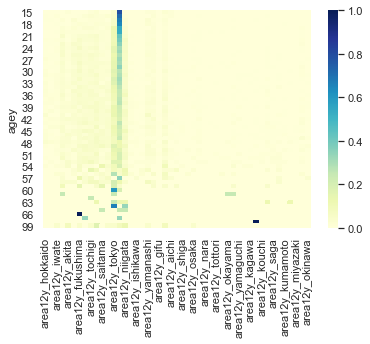

In [115]:
sns.heatmap(df_age_area12y_mean, cmap="YlGnBu")